In [58]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('D:/20224329/基于XGBoost的印度工科毕业生的薪资预测/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/20224329/基于XGBoost的印度工科毕业生的薪资预测/dataset\Engineering_graduate_salary.csv


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [60]:
df = pd.read_csv('D:/20224329/基于XGBoost的印度工科毕业生的薪资预测/dataset\Engineering_graduate_salary.csv')
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [61]:
df.shape

(2998, 34)

In [62]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

**Dropping Columns**


In [63]:
df.drop(['ID','DOB',  'CollegeID', '10board', '12graduation','12board', 'CollegeState',
       'CollegeCityID', 'CollegeCityTier','GraduationYear'],axis =1, inplace=True)

In [64]:
df.head

<bound method NDFrame.head of      Gender  10percentage  12percentage  CollegeTier       Degree  \
0         f         87.80         84.00            1  B.Tech/B.E.   
1         m         57.00         64.50            2  B.Tech/B.E.   
2         m         77.33         85.17            2  B.Tech/B.E.   
3         m         84.30         86.00            1  B.Tech/B.E.   
4         f         82.00         75.00            2  B.Tech/B.E.   
...     ...           ...           ...          ...          ...   
2993      f         75.00         73.00            2  B.Tech/B.E.   
2994      f         84.00         77.00            2  B.Tech/B.E.   
2995      m         91.40         65.56            2  B.Tech/B.E.   
2996      m         88.64         65.16            2  B.Tech/B.E.   
2997      m         77.00         75.50            2  B.Tech/B.E.   

                                 Specialization  collegeGPA  English  Logical  \
0       instrumentation and control engineering       73.82 

In [65]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [66]:
df=df.drop_duplicates()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   object 
 1   10percentage           2998 non-null   float64
 2   12percentage           2998 non-null   float64
 3   CollegeTier            2998 non-null   int64  
 4   Degree                 2998 non-null   object 
 5   Specialization         2998 non-null   object 
 6   collegeGPA             2998 non-null   float64
 7   English                2998 non-null   int64  
 8   Logical                2998 non-null   int64  
 9   Quant                  2998 non-null   int64  
 10  Domain                 2998 non-null   float64
 11  ComputerProgramming    2998 non-null   int64  
 12  ElectronicsAndSemicon  2998 non-null   int64  
 13  ComputerScience        2998 non-null   int64  
 14  MechanicalEngg         2998 non-null   int64  
 15  Elec

In [68]:
df.describe

<bound method NDFrame.describe of      Gender  10percentage  12percentage  CollegeTier       Degree  \
0         f         87.80         84.00            1  B.Tech/B.E.   
1         m         57.00         64.50            2  B.Tech/B.E.   
2         m         77.33         85.17            2  B.Tech/B.E.   
3         m         84.30         86.00            1  B.Tech/B.E.   
4         f         82.00         75.00            2  B.Tech/B.E.   
...     ...           ...           ...          ...          ...   
2993      f         75.00         73.00            2  B.Tech/B.E.   
2994      f         84.00         77.00            2  B.Tech/B.E.   
2995      m         91.40         65.56            2  B.Tech/B.E.   
2996      m         88.64         65.16            2  B.Tech/B.E.   
2997      m         77.00         75.50            2  B.Tech/B.E.   

                                 Specialization  collegeGPA  English  Logical  \
0       instrumentation and control engineering       73

In [69]:
df.describe()

,10percentage,12percentage,CollegeTier,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,77.666264,74.341061,1.924616,71.509857,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,10.002785,11.120299,0.264053,8.122462,105.304512,87.299850,122.194955,0.463373,204.526227,158.737747,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,43.000000,40.000000,1.000000,6.630000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,71.140000,66.000000,2.000000,66.530000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,78.965000,74.000000,2.000000,71.800000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,85.600000,82.600000,2.000000,76.300000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,97.760000,98.700000,2.000000,99.930000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


In [70]:
df.Degree.unique()

array(['B.Tech/B.E.', 'M.Tech./M.E.', 'MCA', 'M.Sc. (Tech.)'],
      dtype=object)

**Specialized Column**


In [71]:
df.Specialization.unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application',
       'computer science and technology', 'electrical engineering',
       'automobile/automotive engineering',
       'electronics and electrical engineering',
       'information science engineering', 'chemical engineering',
       'instrumentation engineering', 'electronics & instrumentation eng',
       'ceramic engineering', 'metallurgical engineering',
       'aeronautical engineering', 'electronics engineering',
       'electronics and instrumentation engineering',
       'applied electronics and instrumentation', 'civil engineering',
       'computer and communication engineering',
       'industrial & production engineering', 'computer networking',
       'other', '

In [72]:
Specialization=df.Specialization.value_counts(ascending=False)
Specialization

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electron

In [73]:
specialization = df.Specialization.value_counts(ascending = False)
specialization

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electron

In [74]:
specializationlessthan10 = specialization[specialization<=10]
specializationlessthan10

Specialization
other                                      10
industrial & production engineering         8
chemical engineering                        7
applied electronics and instrumentation     5
mechanical and automation                   5
telecommunication engineering               4
automobile/automotive engineering           4
computer science and technology             4
aeronautical engineering                    3
instrumentation engineering                 3
electronics and computer engineering        3
mechatronics                                3
metallurgical engineering                   2
industrial engineering                      2
biomedical engineering                      2
information & communication technology      1
electronics                                 1
embedded systems technology                 1
industrial & management engineering         1
electrical and power engineering            1
computer and communication engineering      1
mechanical & produc

In [75]:
def removespeciallessthan10(value):
    if value in specializationlessthan10:
        return 'other'
    else:
        return value
df.Specialization = df.Specialization.apply(removespeciallessthan10)
df.Specialization.unique()


array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application', 'other',
       'electrical engineering', 'electronics and electrical engineering',
       'information science engineering',
       'electronics & instrumentation eng', 'electronics engineering',
       'electronics and instrumentation engineering', 'civil engineering'],
      dtype=object)

In [76]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


GPA

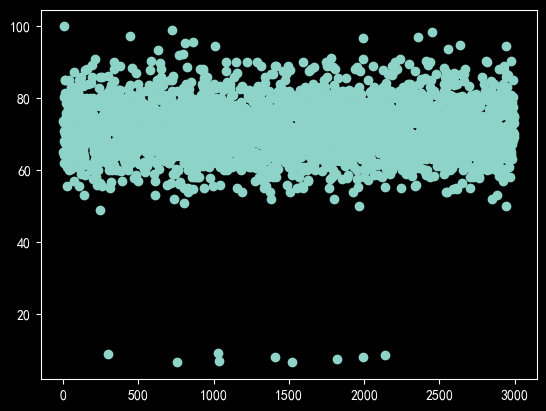

In [77]:
plt.scatter(df.index, df['collegeGPA'])

In [78]:
df = df[(df['collegeGPA']>40)]
df.shape

(2989, 24)

Visualizing English, Logical and Quant Marks

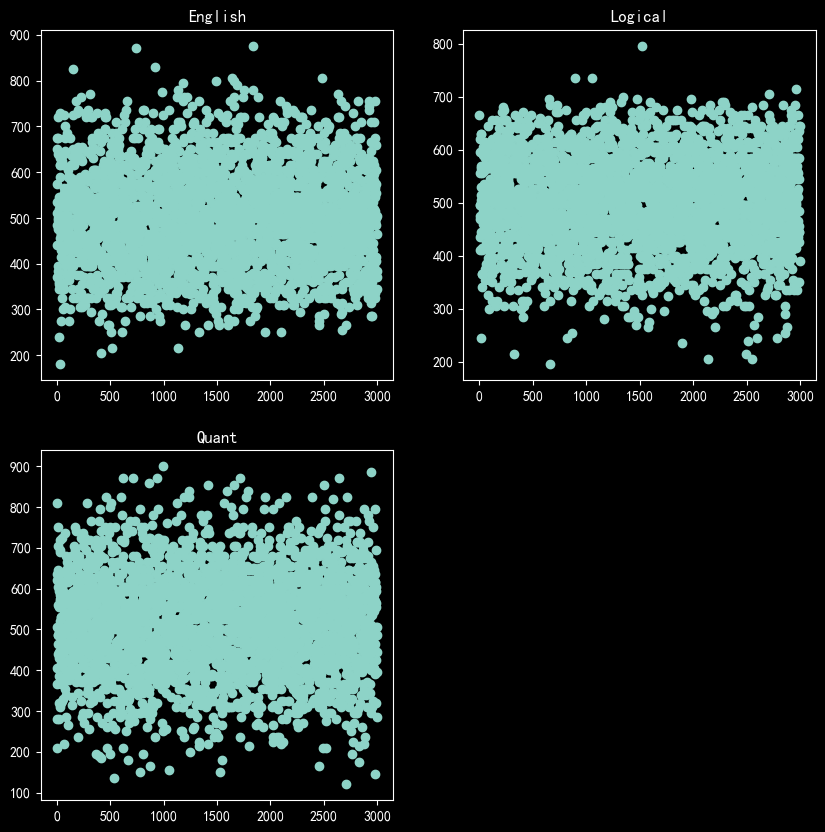

In [79]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(df.index, df.English)
plt.title('English')

plt.subplot(2,2,2)
plt.scatter(df.index, df.Logical)
plt.title('Logical')

plt.subplot(2,2,3)
plt.scatter(df.index, df.Quant)
plt.title('Quant')

plt.show()

In [80]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [81]:
df.columns

Index(['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

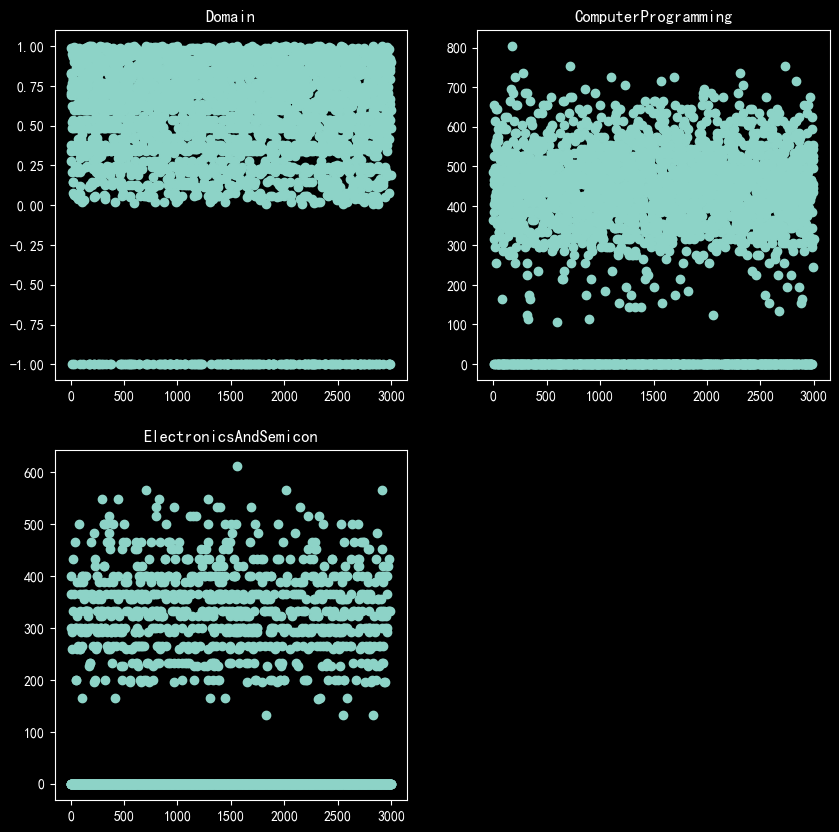

In [82]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(df.index, df.Domain)
plt.title('Domain')

plt.subplot(2,2,2)
plt.scatter(df.index, df.ComputerProgramming)
plt.title('ComputerProgramming')

plt.subplot(2,2,3)
plt.scatter(df.index, df.ElectronicsAndSemicon)
plt.title('ElectronicsAndSemicon')

plt.show()

Replacing -1 with Null


In [83]:
df = df.replace(-1, np.nan)

Filling Null Values with Mean


In [84]:
cols_with_nan = [column for column in df.columns if df.isna().sum()[column] > 0]
for column in cols_with_nan:
    df[column] = df[column].fillna(df[column].mean())

In [85]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


<Axes: xlabel='Gender', ylabel='count'>

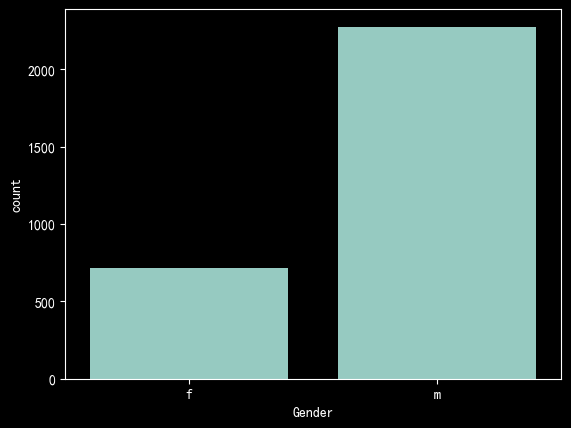

In [86]:
sns.countplot(x=df["Gender"])

<Axes: xlabel='10percentage', ylabel='12percentage'>

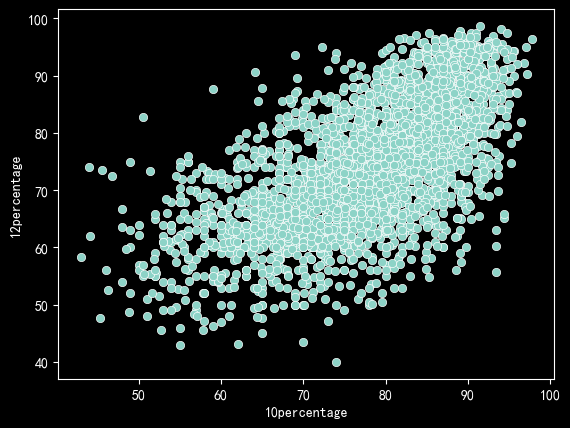

In [87]:
sns.scatterplot(x=df['10percentage'], y=df['12percentage'])

<Axes: xlabel='10percentage', ylabel='12percentage'>

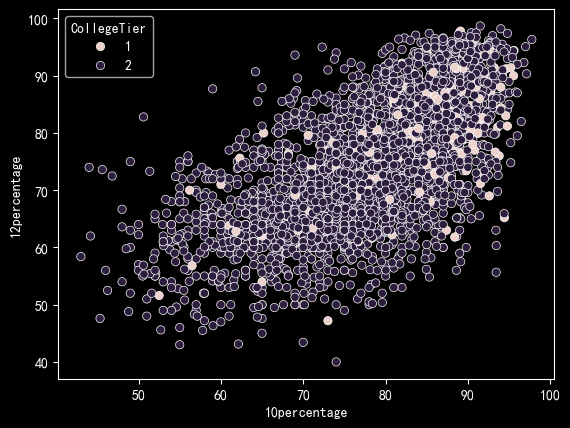

In [88]:
sns.scatterplot(x=df['10percentage'], y=df['12percentage'], hue = df.CollegeTier)

Dropping 10 Percentage 


In [89]:
df.drop(['10percentage'], axis = 1, inplace = True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'instrumentation and control engineering'),
  Text(1, 0, 'computer science & engineering'),
  Text(2, 0, 'electronics & telecommunications'),
  Text(3, 0, 'biotechnology'),
  Text(4, 0, 'mechanical engineering'),
  Text(5, 0, 'information technology'),
  Text(6, 0, 'electronics and communication engineering'),
  Text(7, 0, 'computer engineering'),
  Text(8, 0, 'computer application'),
  Text(9, 0, 'other'),
  Text(10, 0, 'electrical engineering'),
  Text(11, 0, 'electronics and electrical engineering'),
  Text(12, 0, 'information science engineering'),
  Text(13, 0, 'electronics & instrumentation eng'),
  Text(14, 0, 'electronics engineering'),
  Text(15, 0, 'electronics and instrumentation engineering'),
  Text(16, 0, 'civil engineering')])

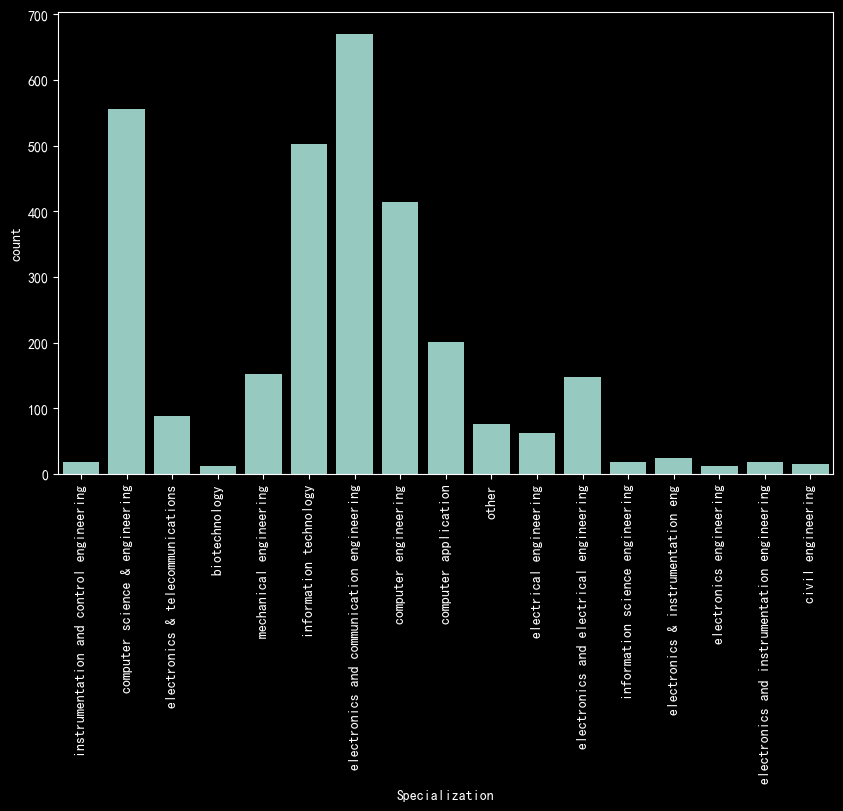

In [90]:
plt.figure(figsize = (10,6))
sns.countplot(x=df['Specialization'])
plt.xticks(rotation = 90)

In [91]:
df.head()

,Gender,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,0.694479,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,0.342315,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,0.824666,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,0.990009,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,0.278457,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


<Axes: xlabel='collegeGPA', ylabel='Salary'>

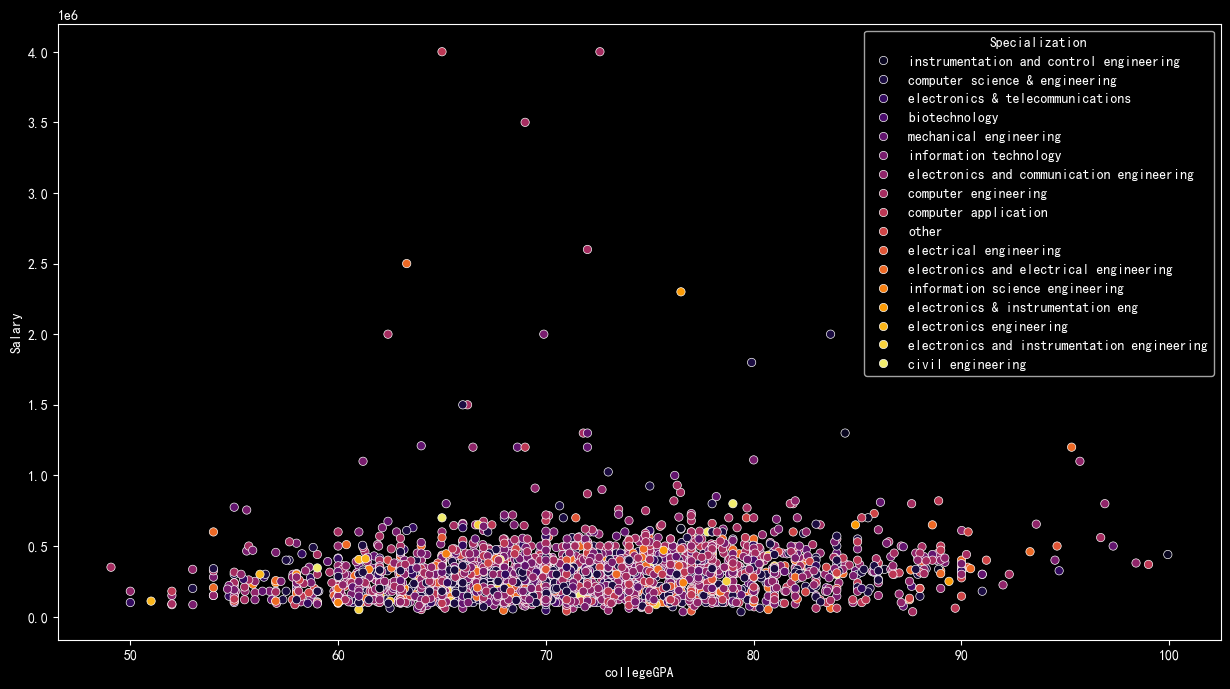

In [92]:
plt.figure(figsize = (15,8))
sns.scatterplot(x=df.collegeGPA, y=df.Salary, hue = df.Specialization, palette = 'inferno')

<Axes: xlabel='collegeGPA', ylabel='Salary'>

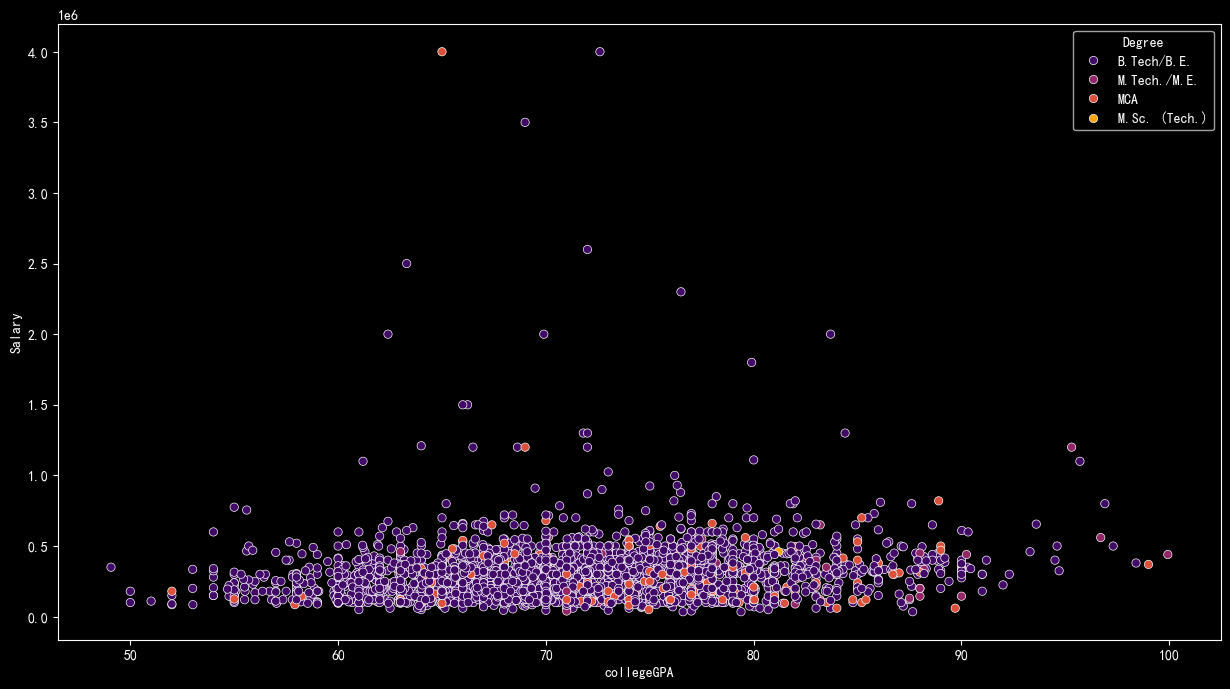

In [93]:
plt.figure(figsize = (15,8))
sns.scatterplot(x=df.collegeGPA, y=df.Salary, hue = df.Degree, palette = 'inferno')

**Openness to Experience vs Salary**


<Axes: xlabel='openess_to_experience', ylabel='Salary'>

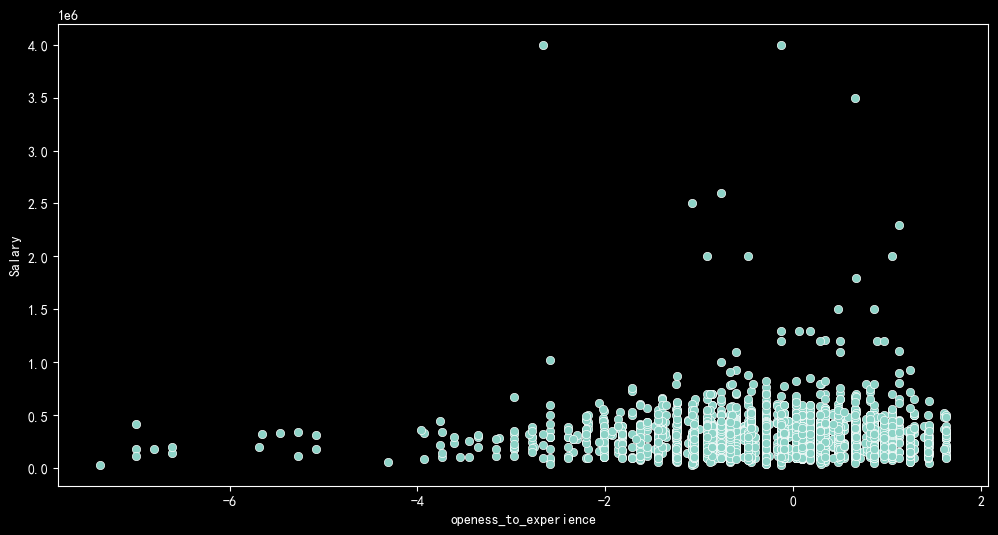

In [94]:
plt.figure(figsize = (12,6))
sns.scatterplot(x=df.openess_to_experience, y=df.Salary)

**Domain vs Salary**


<Axes: xlabel='Domain', ylabel='Salary'>

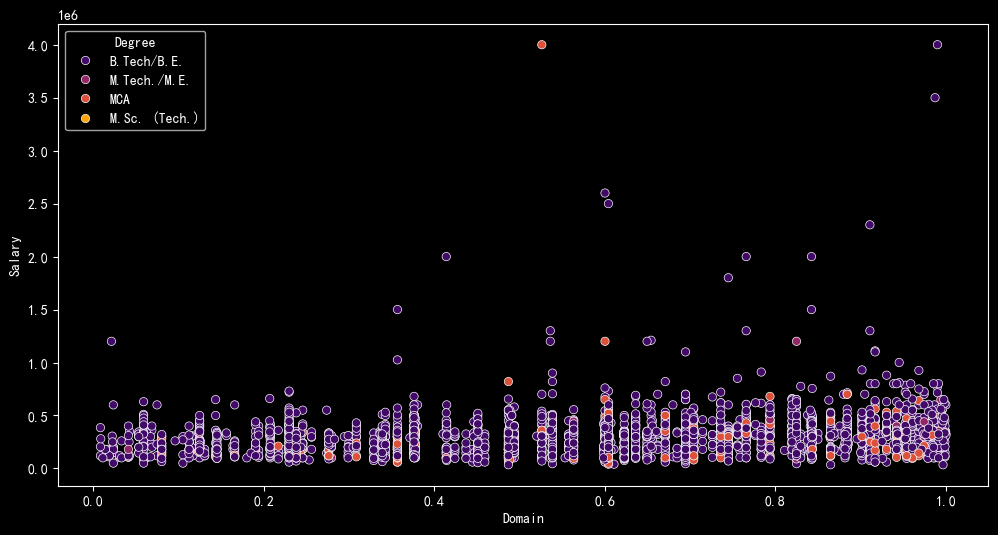

In [95]:
plt.figure(figsize = (12,6))
sns.scatterplot(x=df.Domain, y=df.Salary, hue = df.Degree, palette = 'inferno')

In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.Gender = le.fit_transform(df.Gender)
df.Degree = le.fit_transform(df.Degree)
df.Specialization = le.fit_transform(df.Specialization)

df.head()


,Gender,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,84.00,1,0,14,73.82,650,665,810,0.694479,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,64.50,2,0,4,65.00,440,435,210,0.342315,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,85.17,2,0,7,61.94,485,475,505,0.824666,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,86.00,1,0,4,80.40,675,620,635,0.990009,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,75.00,2,0,0,64.30,575,495,365,0.278457,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


<Axes: >

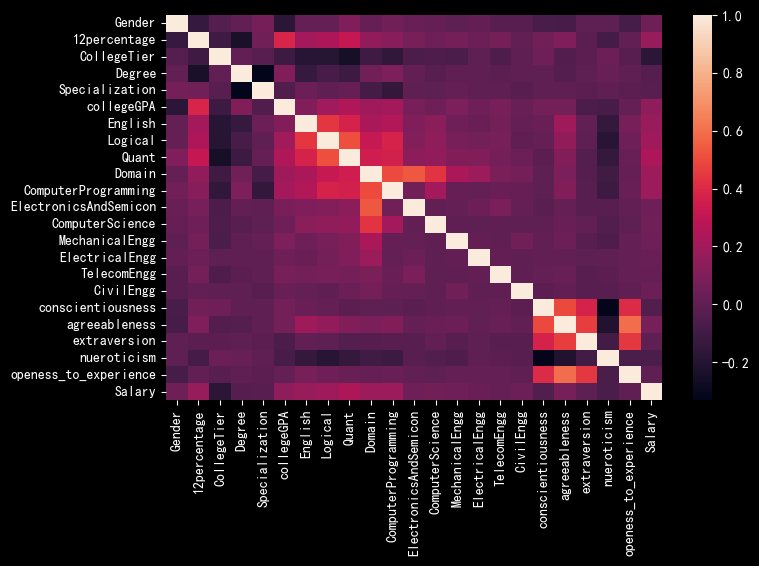

In [97]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr())

**Creating XGBoost Model**


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor

In [99]:
x = df.drop('Salary', axis=1)
y = df['Salary']

sc = StandardScaler()
x = sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)

In [100]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [101]:
predictions = xgb.predict(X_test)


In [102]:
diff = y_test - predictions

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7692\668418042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)


<Axes: xlabel='Salary', ylabel='Density'>

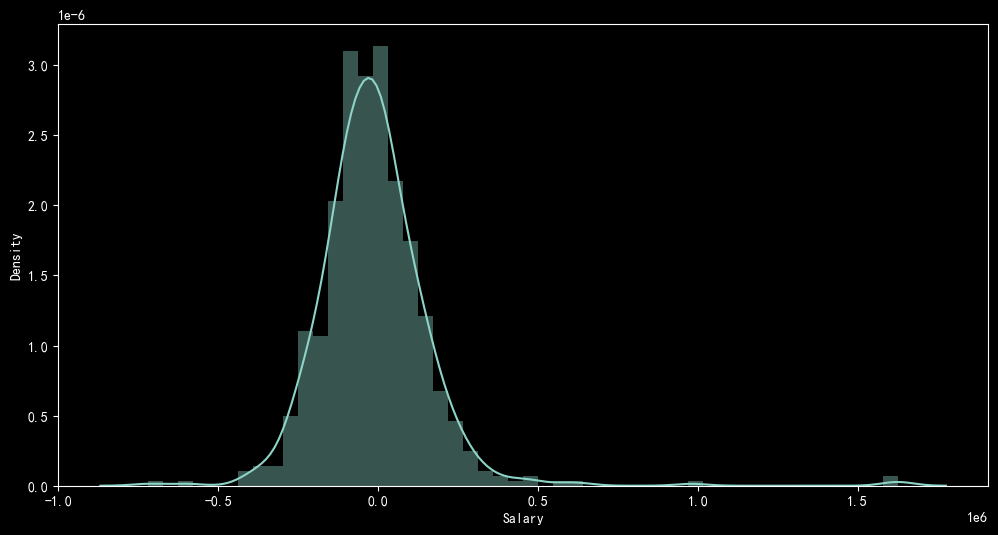

In [103]:
plt.figure(figsize = (12,6))
sns.distplot(diff)

In [104]:
xgb_r2_score = xgb.score(X_test, y_test)

print("XGBoost R2 Score: ", (xgb_r2_score))

XGBoost R2 Score:  0.026684186270624632


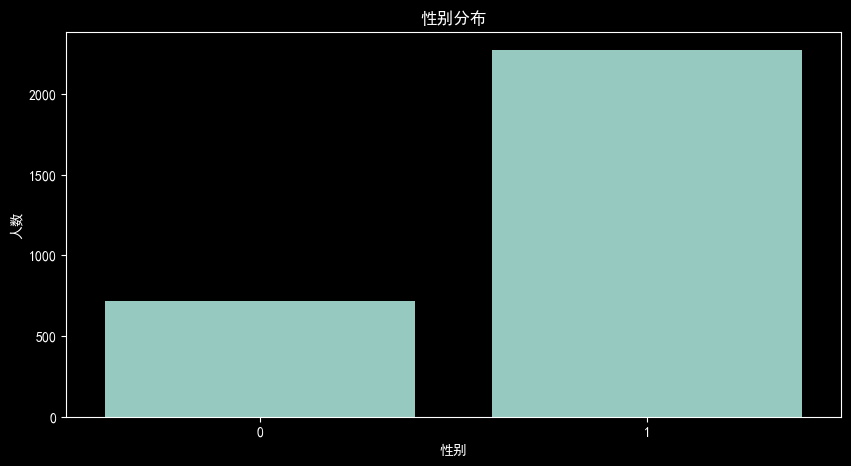

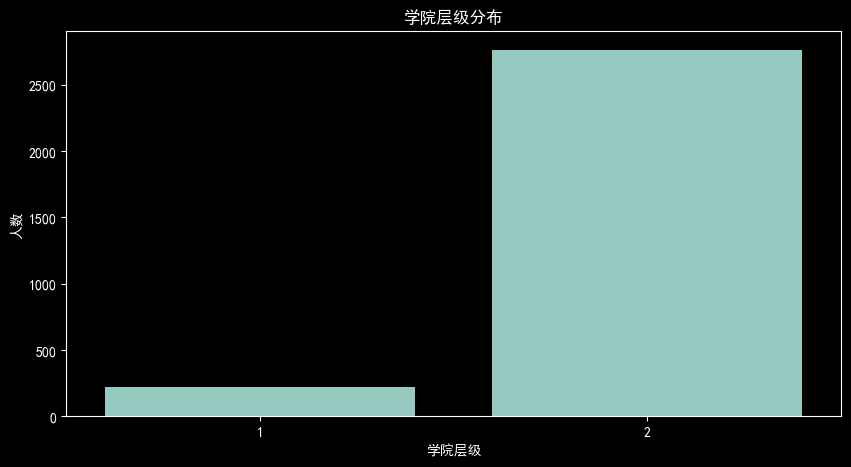

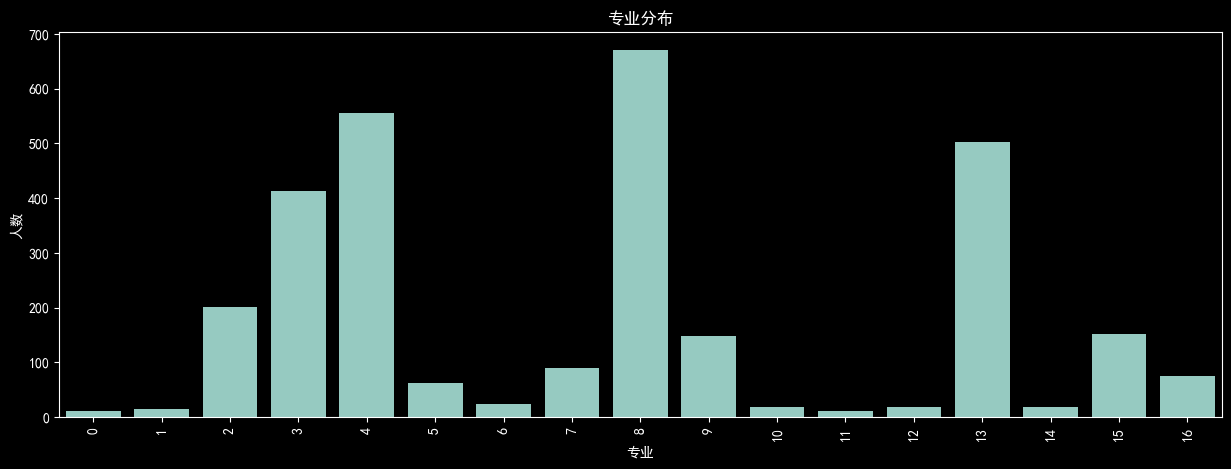

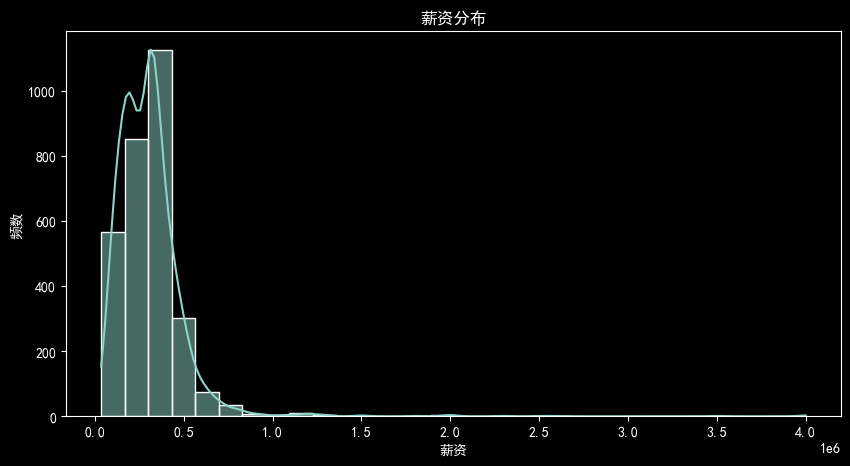

In [105]:
import matplotlib.font_manager as fm

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 重要特征的可视化分析（中文标注）

# 性别分布
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Gender')
plt.title('性别分布')
plt.xlabel('性别')
plt.ylabel('人数')
plt.show()

# 学院层级分布
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='CollegeTier')
plt.title('学院层级分布')
plt.xlabel('学院层级')
plt.ylabel('人数')
plt.show()

# 专业分布
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='Specialization')
plt.xticks(rotation=90)
plt.title('专业分布')
plt.xlabel('专业')
plt.ylabel('人数')
plt.show()

# 薪资分布
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Salary', bins=30, kde=True)
plt.title('薪资分布')
plt.xlabel('薪资')
plt.ylabel('频数')
plt.show()


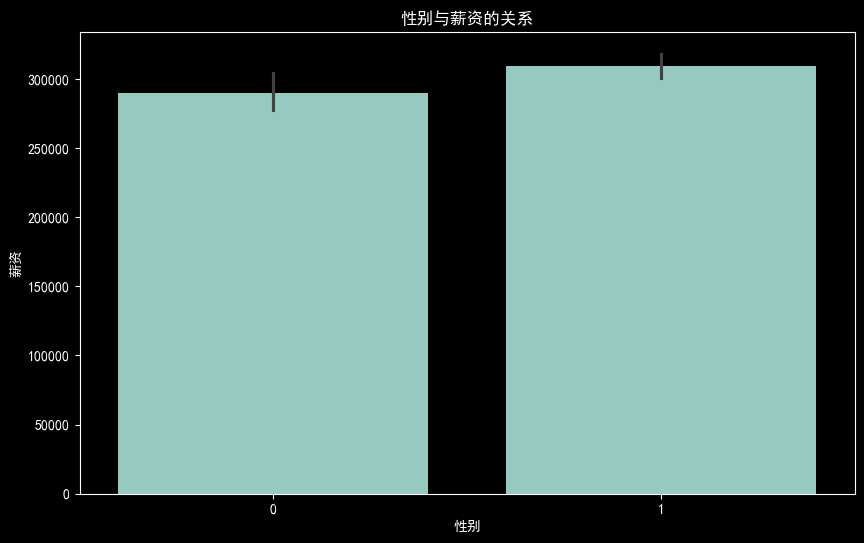

In [106]:
# 性别与薪资的关系
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Salary', data=df)
plt.title('性别与薪资的关系')
plt.xlabel('性别')
plt.ylabel('薪资')
plt.show()




In [107]:
# 特征相关性热力图
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('特征相关性矩阵')
plt.show()


NameError: name 'data' is not defined

<Figure size 1400x1000 with 0 Axes>